# 1.Import libraries

In [1]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.4 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=ab90021912e32e63db1edbf426c5aa4da701ab6a759b029ccf34f9dc3df75b27
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [2]:
import os
import glob
from IPython.display import Image, display
from IPython import display

import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
# display.clear_output()

In [ ]:
# !nvidia-smi

# 2.Create Directory

In [3]:
HOME = os.getcwd()

In [4]:
!mkdir {HOME}/datasets

# 3.Importing the dataset from roboflow

In [5]:
%cd {HOME}/datasets

/content/datasets


In [6]:
# Copy the following code from roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="50DLCu4aJDBaf7tVrkFB")
project = rf.workspace("brad-dwyer").project("pothole-voxrl")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.0, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Pothole-1 in yolov8:: 100%|██████████| 1342/1342 [00:00<00:00, 6544.12it/s]


# 4.Train the YOLOv8 Model

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Pothole-1/data.yaml epochs=50 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 300MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Pothole-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937,

In [ ]:
# # Check the output
# !ls {HOME}//runs/detect/train

# 5.Evaluation

## 5.1 Confusion Matrix

/content


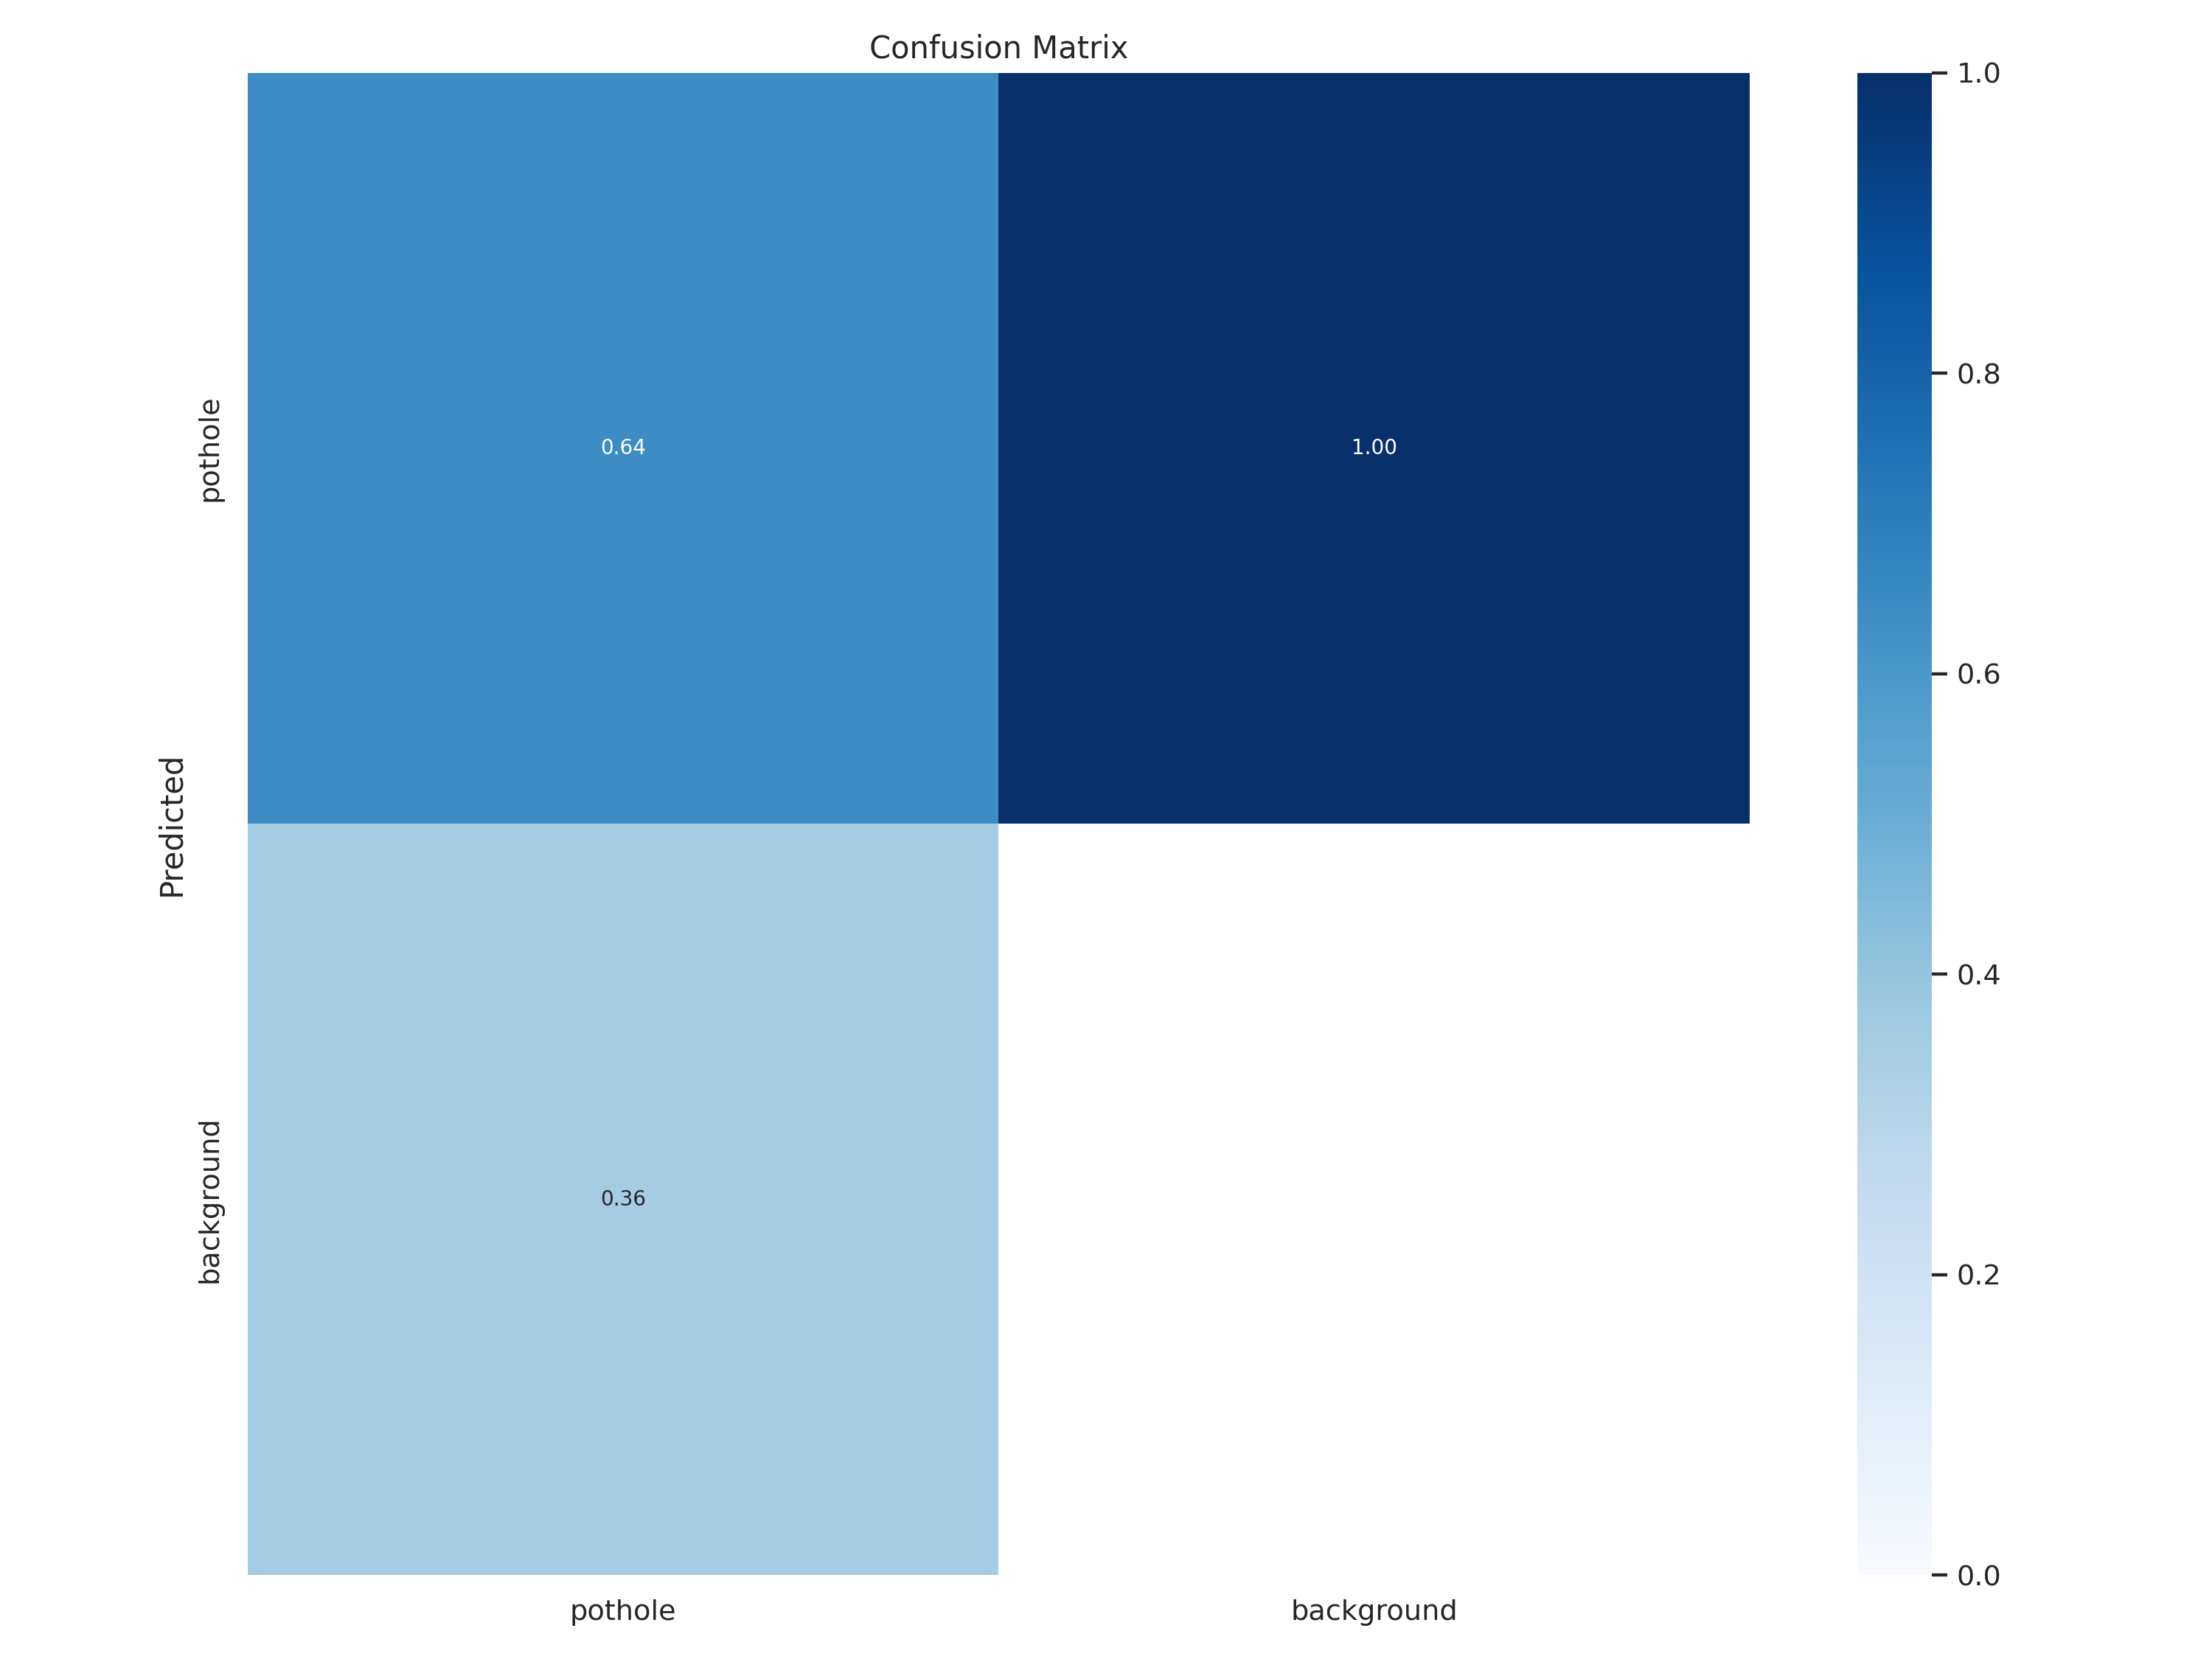

In [8]:
#Confusion matrix
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

## 5.2 .Loss and Accuracy

/content


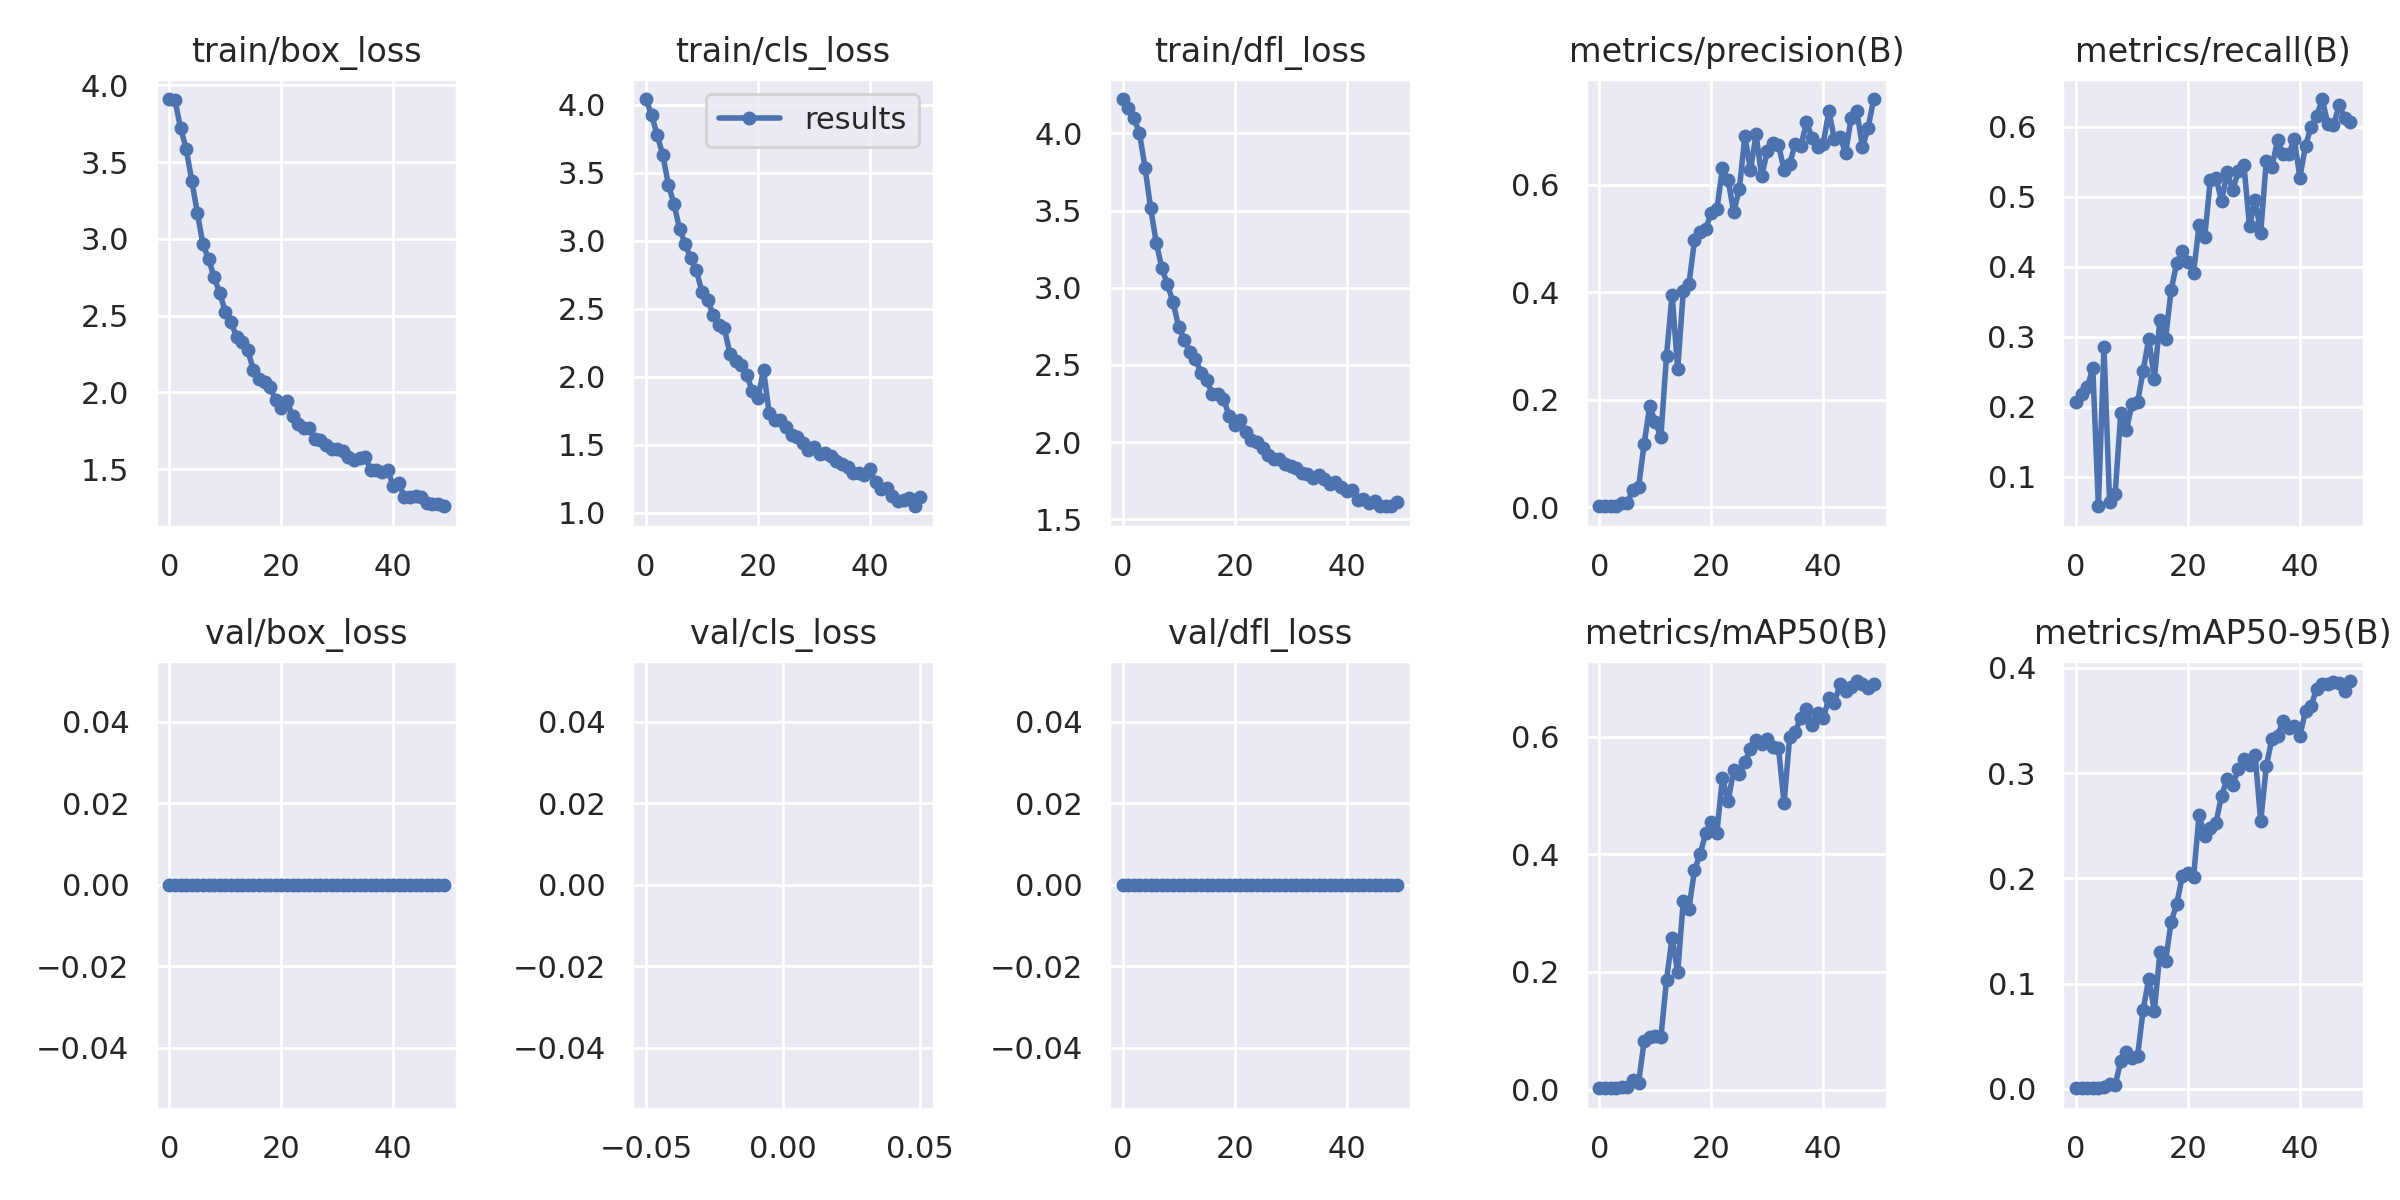

In [9]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

# 6.Validation

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/Pothole/data.yaml

/content
Error executing job with overrides: ['task=detect', 'mode=val', 'model=/content/runs/detect/train/weights/best.pt', 'data=/content/datasets/Pothole/data.yaml']
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cli.py", line 52, in cli
    func(cfg)
  File "/usr/local/lib/python3.10/dist-packages/hydra/main.py", line 83, in decorated_main
    return task_function(cfg_passthrough)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/v8/detect/val.py", line 235, in val
    validator = DetectionValidator(args=cfg)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/v8/detect/val.py", line 24, in __init__
    self.data_dict = yaml_load(check_file(self.args.data), append_filename=True) if self.args.data else None
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/checks.py", line 222, in check_file
    assert len(files), f'File not found: {file}'  # assert file was found
AssertionError: Fi

/content


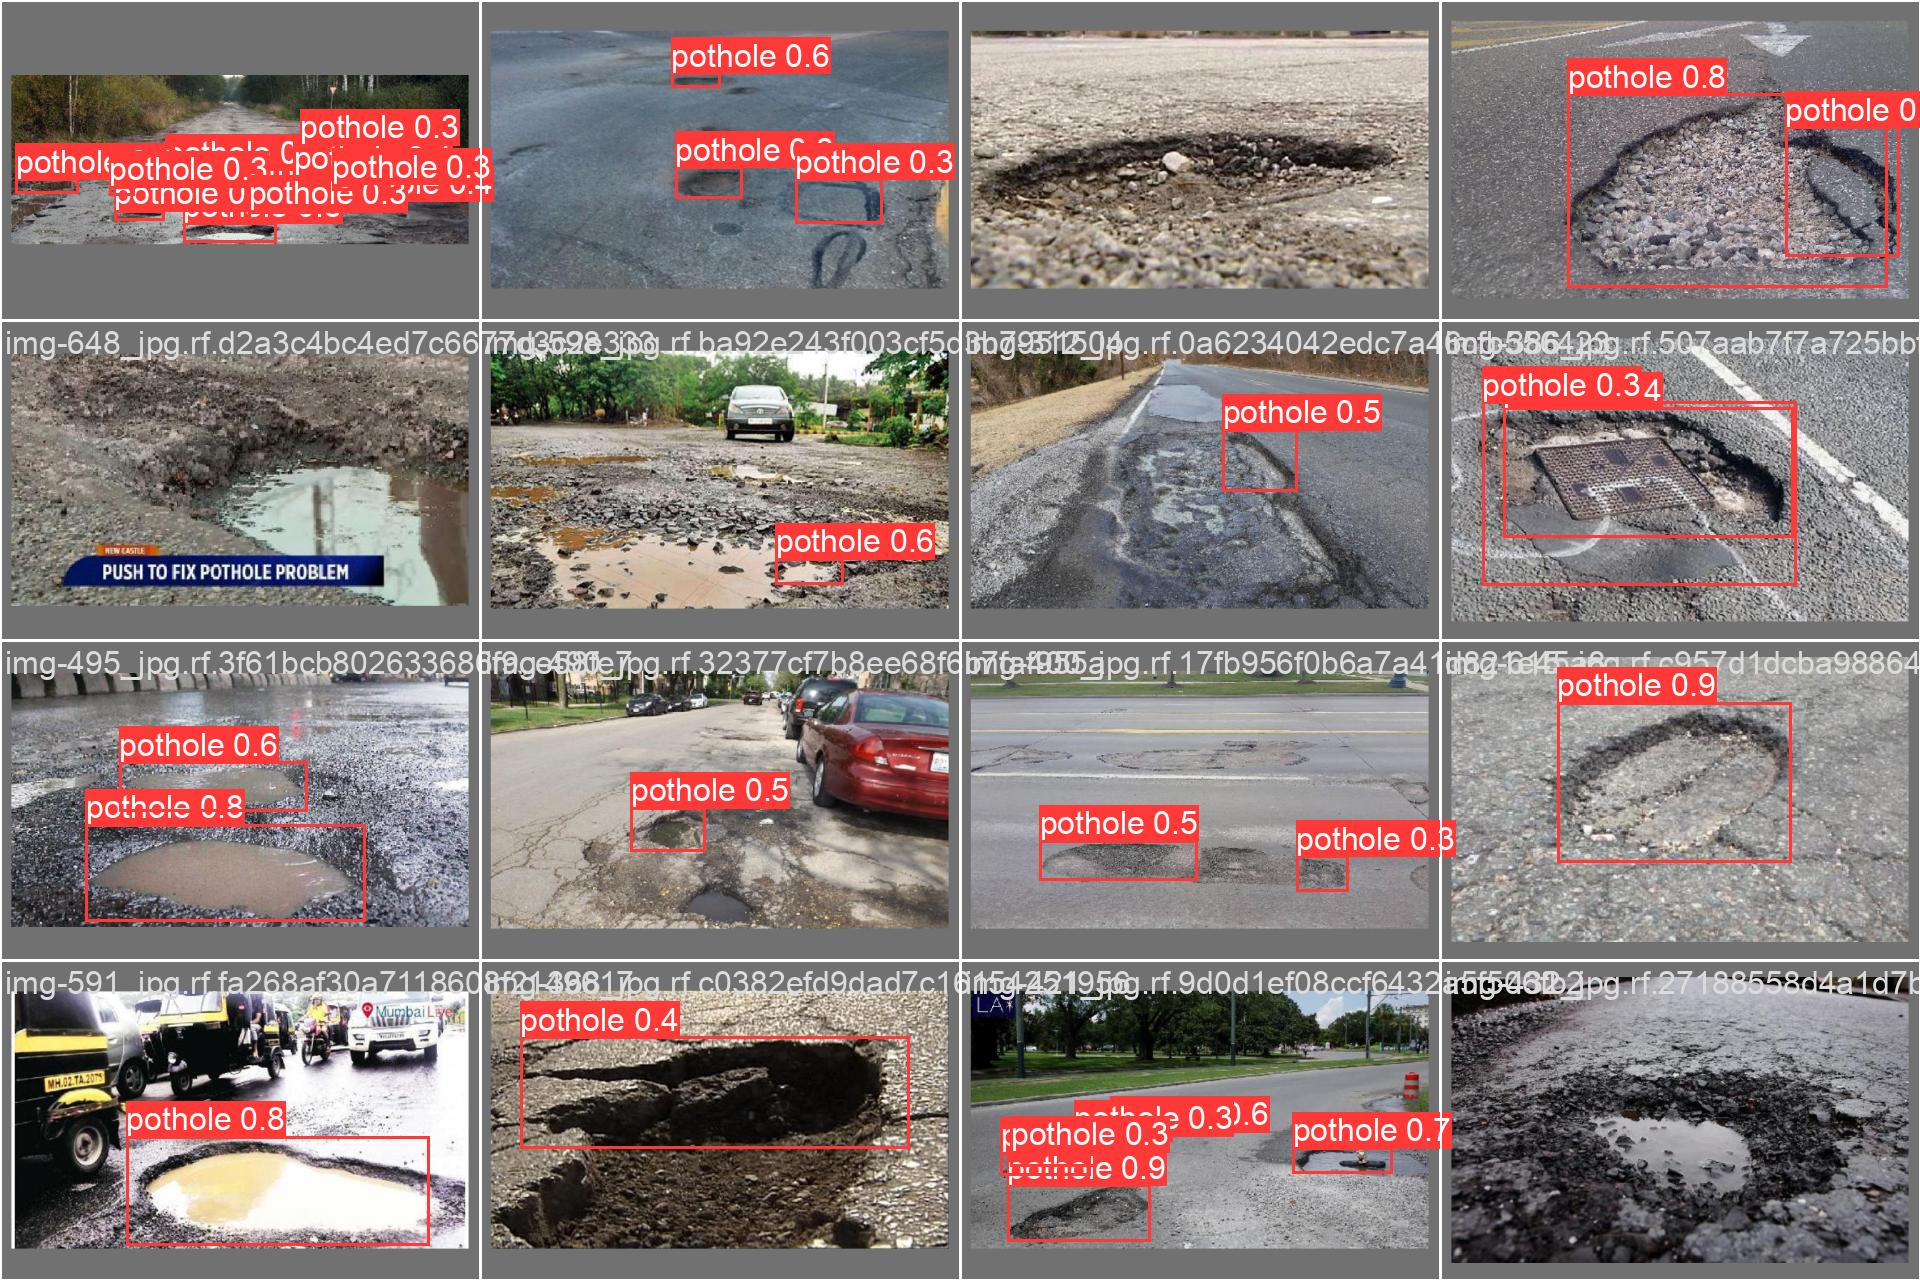

In [11]:
#Model Prediction on validation batch
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

# 7.Test

In [14]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Pothole-1/test/images

/content
2023-10-19 03:58:27.363288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 03:58:28.348110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/67 /content/datasets/Pothole-1/test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg: 640x640 1 pothole, 37.0ms
image 2/67 /content/datasets/Pothole-1/test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 640x640 1 pothole, 36.3ms
image 3/67 /content/datasets/Pothole-1/test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg: 640x640 1 poth

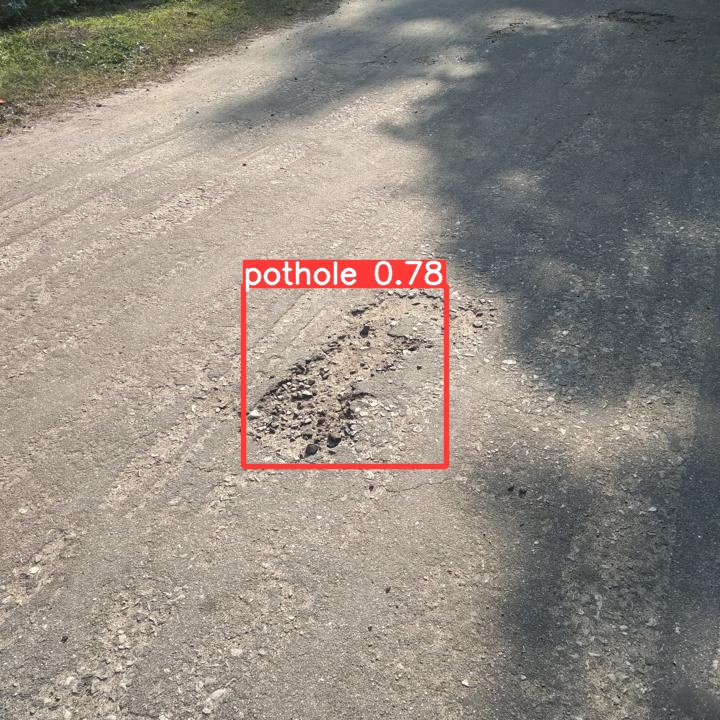

In [17]:
Image("/content/runs/detect/predict2/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg")

# 8.Test (on a Demo Video)

In [18]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 18.9MB/s]


In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2023-10-19 03:59:56.506534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 03:59:57.720990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 1 pothole, 67.1ms
video 1/1 (2/324) /content/demo.mp4: 384x640 2 potholes, 25.9ms
video 1/1 (3/324) /content/demo.mp4: 384x640 2 potholes, 25.8ms
video 1/1 (4/324) /content/demo.mp4: 384x640 3 potholes, 25.8ms
video 1/1 (5/324) /content/demo.mp4: 384x640 3 potholes, 25.8ms
video 1/1 (6/324) /content/demo.mp4: 384x640 3 potholes, 20

In [ ]:
# !rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

# 9.Download the model

In [20]:
!yolo task=detect mode=export model=yolov8m.pt format=onnx

2023-10-19 04:00:24.373779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 04:00:25.962552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Fusing layers... 
YOLOv8m summary: 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from yolov8m.pt with output shape (1, 84, 8400) (49.7 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 97.6 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.

In [ ]:
# #Initialize YOLO with the model name
# model = YOLO("yolov8m.pt")

# #Export the Model in the onnx format
# model.export(format="onnx")

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
